In [5]:
import socket
import numpy as np
import struct
import requests
from IPython.display import Audio

In [6]:
class hud_payload():
    
    def __init__(self):
        self.name = ''
        self.lat = 0.0
        self.lon = 0.0
        self.speed = 0
        self.directions = 0
        self.distance_to_next = 0.0
        self.url1 = "http://{}/name?value={}"
        self.url2 = "http://{}/lat?value={}"
        self.url3 = "http://{}/lon?value={}"
        self.url4 = "http://{}/speed?value={}"
        self.url5 = "http://{}/dir?value={}"
        self.url6 = "http://{}/dist_next_step?value={}"
    
    def process_payload(self, hud_data):
        self.name = hud_data[0:4].decode(encoding)
        self.lat = struct.unpack('f',hud_data[4:8])[0]
        self.lon = struct.unpack('f',hud_data[8:12])[0]
        self.speed = int.from_bytes(hud_data[12:13], "little")
        self.directions = int.from_bytes(hud_data[13:14], "little")
        self.distance_to_next = struct.unpack('f',hud_data[14:18])[0]
    
    def send_data_hud(self,IP_ADDR):
        resp = requests.get(self.url1.format(IP_ADDR, self.name))
        resp = requests.get(self.url2.format(IP_ADDR, self.lat))
        resp = requests.get(self.url3.format(IP_ADDR, self.lon))
        resp = requests.get(self.url4.format(IP_ADDR, self.speed))
        resp = requests.get(self.url5.format(IP_ADDR, self.directions))
        resp = requests.get(self.url6.format(IP_ADDR, self.distance_to_next))
        
    def to_string(self):
        print("name             = {}".format(self.name))
        print("lat              = {}".format(self.lat))
        print("lon              = {}".format(self.lon))
        print("speed            = {}".format(self.speed))
        print("directions       = {}".format(self.directions))
        print("distance_to_next = {}".format(self.distance_to_next))


In [32]:
NUM_FRAMES = 6000
TX_BB_IN_BITS = 784
TX_BB_IN_BYTES = int(TX_BB_IN_BITS/8)
encoding = 'utf-8'
IP_ADDR = "192.168.1.17"
HUD_PAYLOAD_LEN = 18
AUDO_PAYLOAD_LEN = int(80/2) #int16 data, so 2 bytes per sample

hp = hud_payload()
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM, 0)
audio_file = np.zeros(NUM_FRAMES*AUDO_PAYLOAD_LEN, dtype=np.int16)

HOST = ''
PORT = 15050

with socket.socket(socket.AF_INET, socket.SOCK_DGRAM, 0) as s:
    s.bind((HOST, PORT))
    #for i in range(NUM_FRAMES):
    for i in range(NUM_FRAMES):
        packet, addr = s.recvfrom(TX_BB_IN_BYTES)
        print("received frame = {}".format(i+1))
        #print(packet)
        #print(addr)
        #hud_data = packet[0:18]
        #hp.process_payload(packet[0:18])
        #hp.to_string()
        #if (i%5) == 0:
        #hp.send_data_hud(IP_ADDR)
        #audio_data = packet[18:]
        audio_data = np.frombuffer(packet[18:], np.int16)
        np.copyto(audio_file[i*AUDO_PAYLOAD_LEN:(i+1)*AUDO_PAYLOAD_LEN], audio_data)

received frame = 1
received frame = 2
received frame = 3
received frame = 4
received frame = 5
received frame = 6
received frame = 7
received frame = 8
received frame = 9
received frame = 10
received frame = 11
received frame = 12
received frame = 13
received frame = 14
received frame = 15
received frame = 16
received frame = 17
received frame = 18
received frame = 19
received frame = 20
received frame = 21
received frame = 22
received frame = 23
received frame = 24
received frame = 25
received frame = 26
received frame = 27
received frame = 28
received frame = 29
received frame = 30
received frame = 31
received frame = 32
received frame = 33
received frame = 34
received frame = 35
received frame = 36
received frame = 37
received frame = 38
received frame = 39
received frame = 40
received frame = 41
received frame = 42
received frame = 43
received frame = 44
received frame = 45
received frame = 46
received frame = 47
received frame = 48
received frame = 49
received frame = 50
received 

received frame = 397
received frame = 398
received frame = 399
received frame = 400
received frame = 401
received frame = 402
received frame = 403
received frame = 404
received frame = 405
received frame = 406
received frame = 407
received frame = 408
received frame = 409
received frame = 410
received frame = 411
received frame = 412
received frame = 413
received frame = 414
received frame = 415
received frame = 416
received frame = 417
received frame = 418
received frame = 419
received frame = 420
received frame = 421
received frame = 422
received frame = 423
received frame = 424
received frame = 425
received frame = 426
received frame = 427
received frame = 428
received frame = 429
received frame = 430
received frame = 431
received frame = 432
received frame = 433
received frame = 434
received frame = 435
received frame = 436
received frame = 437
received frame = 438
received frame = 439
received frame = 440
received frame = 441
received frame = 442
received frame = 443
received fram

received frame = 788
received frame = 789
received frame = 790
received frame = 791
received frame = 792
received frame = 793
received frame = 794
received frame = 795
received frame = 796
received frame = 797
received frame = 798
received frame = 799
received frame = 800
received frame = 801
received frame = 802
received frame = 803
received frame = 804
received frame = 805
received frame = 806
received frame = 807
received frame = 808
received frame = 809
received frame = 810
received frame = 811
received frame = 812
received frame = 813
received frame = 814
received frame = 815
received frame = 816
received frame = 817
received frame = 818
received frame = 819
received frame = 820
received frame = 821
received frame = 822
received frame = 823
received frame = 824
received frame = 825
received frame = 826
received frame = 827
received frame = 828
received frame = 829
received frame = 830
received frame = 831
received frame = 832
received frame = 833
received frame = 834
received fram

received frame = 1171
received frame = 1172
received frame = 1173
received frame = 1174
received frame = 1175
received frame = 1176
received frame = 1177
received frame = 1178
received frame = 1179
received frame = 1180
received frame = 1181
received frame = 1182
received frame = 1183
received frame = 1184
received frame = 1185
received frame = 1186
received frame = 1187
received frame = 1188
received frame = 1189
received frame = 1190
received frame = 1191
received frame = 1192
received frame = 1193
received frame = 1194
received frame = 1195
received frame = 1196
received frame = 1197
received frame = 1198
received frame = 1199
received frame = 1200
received frame = 1201
received frame = 1202
received frame = 1203
received frame = 1204
received frame = 1205
received frame = 1206
received frame = 1207
received frame = 1208
received frame = 1209
received frame = 1210
received frame = 1211
received frame = 1212
received frame = 1213
received frame = 1214
received frame = 1215
received f

received frame = 1544
received frame = 1545
received frame = 1546
received frame = 1547
received frame = 1548
received frame = 1549
received frame = 1550
received frame = 1551
received frame = 1552
received frame = 1553
received frame = 1554
received frame = 1555
received frame = 1556
received frame = 1557
received frame = 1558
received frame = 1559
received frame = 1560
received frame = 1561
received frame = 1562
received frame = 1563
received frame = 1564
received frame = 1565
received frame = 1566
received frame = 1567
received frame = 1568
received frame = 1569
received frame = 1570
received frame = 1571
received frame = 1572
received frame = 1573
received frame = 1574
received frame = 1575
received frame = 1576
received frame = 1577
received frame = 1578
received frame = 1579
received frame = 1580
received frame = 1581
received frame = 1582
received frame = 1583
received frame = 1584
received frame = 1585
received frame = 1586
received frame = 1587
received frame = 1588
received f

received frame = 1917
received frame = 1918
received frame = 1919
received frame = 1920
received frame = 1921
received frame = 1922
received frame = 1923
received frame = 1924
received frame = 1925
received frame = 1926
received frame = 1927
received frame = 1928
received frame = 1929
received frame = 1930
received frame = 1931
received frame = 1932
received frame = 1933
received frame = 1934
received frame = 1935
received frame = 1936
received frame = 1937
received frame = 1938
received frame = 1939
received frame = 1940
received frame = 1941
received frame = 1942
received frame = 1943
received frame = 1944
received frame = 1945
received frame = 1946
received frame = 1947
received frame = 1948
received frame = 1949
received frame = 1950
received frame = 1951
received frame = 1952
received frame = 1953
received frame = 1954
received frame = 1955
received frame = 1956
received frame = 1957
received frame = 1958
received frame = 1959
received frame = 1960
received frame = 1961
received f

received frame = 2290
received frame = 2291
received frame = 2292
received frame = 2293
received frame = 2294
received frame = 2295
received frame = 2296
received frame = 2297
received frame = 2298
received frame = 2299
received frame = 2300
received frame = 2301
received frame = 2302
received frame = 2303
received frame = 2304
received frame = 2305
received frame = 2306
received frame = 2307
received frame = 2308
received frame = 2309
received frame = 2310
received frame = 2311
received frame = 2312
received frame = 2313
received frame = 2314
received frame = 2315
received frame = 2316
received frame = 2317
received frame = 2318
received frame = 2319
received frame = 2320
received frame = 2321
received frame = 2322
received frame = 2323
received frame = 2324
received frame = 2325
received frame = 2326
received frame = 2327
received frame = 2328
received frame = 2329
received frame = 2330
received frame = 2331
received frame = 2332
received frame = 2333
received frame = 2334
received f

received frame = 2663
received frame = 2664
received frame = 2665
received frame = 2666
received frame = 2667
received frame = 2668
received frame = 2669
received frame = 2670
received frame = 2671
received frame = 2672
received frame = 2673
received frame = 2674
received frame = 2675
received frame = 2676
received frame = 2677
received frame = 2678
received frame = 2679
received frame = 2680
received frame = 2681
received frame = 2682
received frame = 2683
received frame = 2684
received frame = 2685
received frame = 2686
received frame = 2687
received frame = 2688
received frame = 2689
received frame = 2690
received frame = 2691
received frame = 2692
received frame = 2693
received frame = 2694
received frame = 2695
received frame = 2696
received frame = 2697
received frame = 2698
received frame = 2699
received frame = 2700
received frame = 2701
received frame = 2702
received frame = 2703
received frame = 2704
received frame = 2705
received frame = 2706
received frame = 2707
received f

received frame = 3036
received frame = 3037
received frame = 3038
received frame = 3039
received frame = 3040
received frame = 3041
received frame = 3042
received frame = 3043
received frame = 3044
received frame = 3045
received frame = 3046
received frame = 3047
received frame = 3048
received frame = 3049
received frame = 3050
received frame = 3051
received frame = 3052
received frame = 3053
received frame = 3054
received frame = 3055
received frame = 3056
received frame = 3057
received frame = 3058
received frame = 3059
received frame = 3060
received frame = 3061
received frame = 3062
received frame = 3063
received frame = 3064
received frame = 3065
received frame = 3066
received frame = 3067
received frame = 3068
received frame = 3069
received frame = 3070
received frame = 3071
received frame = 3072
received frame = 3073
received frame = 3074
received frame = 3075
received frame = 3076
received frame = 3077
received frame = 3078
received frame = 3079
received frame = 3080
received f

KeyboardInterrupt: 

In [25]:
print(len(packet))
print(len(audio_data))
print(len(audio_file))
Audio(audio_file, rate=4000)

98
40
4000


In [26]:
print(audio_file[0:80])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048
 2048 2048 2048 2048 2048 2048 2048 2048 2048 2048]


In [18]:
print(packet)

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'


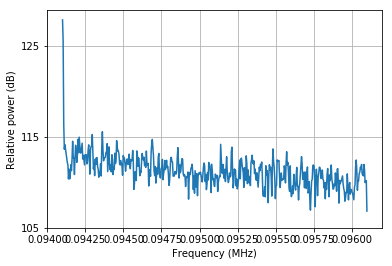

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
# use matplotlib to estimate and plot the PSD
sample_rate = 4e3 
center_freq = 94.1e3
plt.psd(audio_file, NFFT=1024, Fs=sample_rate/1e6, Fc=center_freq/1e6)
plt.xlabel('Frequency (KHz)')
plt.ylabel('Relative power (dB)')

plt.show()

In [ ]:
samples = np.load('samples.npy')